In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# read data

df = pd.read_csv('online_retail_customer_data.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

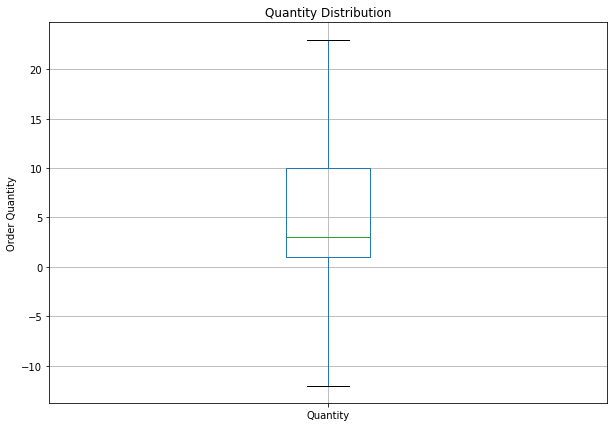

In [4]:
# plotting 'Quantity' distri

ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

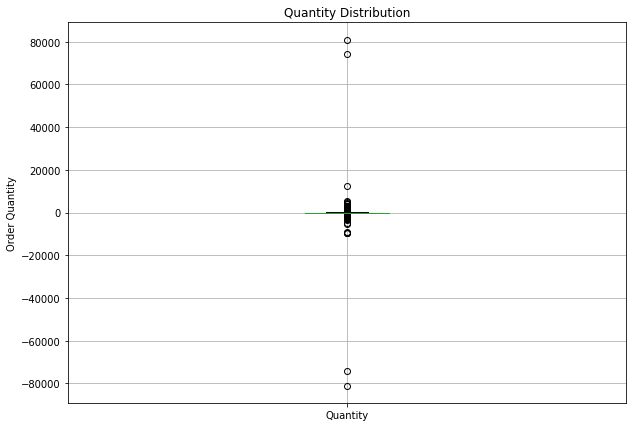

In [7]:
# plotting 'Quantity' distri

ax = df['Quantity'].plot.box(
    showfliers=True,
    grid=True,
    figsize=(10, 7)
)
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [5]:
# description of data 'Quantity' variable

pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [6]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [8]:
df.shape

(541909, 8)

In [9]:
df = df.loc[df['Quantity'] > 0]
df.shape

(531285, 8)

In [14]:
from datetime import datetime

In [16]:
df['InvoiceDate']  # month-day-year

0          12/1/10 8:26
1          12/1/10 8:26
2          12/1/10 8:26
3          12/1/10 8:26
4          12/1/10 8:26
5          12/1/10 8:26
6          12/1/10 8:26
7          12/1/10 8:28
8          12/1/10 8:28
9          12/1/10 8:34
10         12/1/10 8:34
11         12/1/10 8:34
12         12/1/10 8:34
13         12/1/10 8:34
14         12/1/10 8:34
15         12/1/10 8:34
16         12/1/10 8:34
17         12/1/10 8:34
18         12/1/10 8:34
19         12/1/10 8:34
20         12/1/10 8:34
21         12/1/10 8:34
22         12/1/10 8:34
23         12/1/10 8:34
24         12/1/10 8:34
25         12/1/10 8:35
26         12/1/10 8:45
27         12/1/10 8:45
28         12/1/10 8:45
29         12/1/10 8:45
              ...      
541879    12/9/11 12:31
541880    12/9/11 12:31
541881    12/9/11 12:31
541882    12/9/11 12:31
541883    12/9/11 12:31
541884    12/9/11 12:31
541885    12/9/11 12:31
541886    12/9/11 12:31
541887    12/9/11 12:31
541888    12/9/11 12:31
541889    12/9/1

In [25]:
datetime.strptime(df['InvoiceDate'][0], '%m/%d/%y %H:%M')

datetime.datetime(2010, 12, 1, 8, 26)

In [27]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : datetime.strptime(x, '%m/%d/%y %H:%M'))

In [28]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
# time-serires number of orders
# monthly order data frame

monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

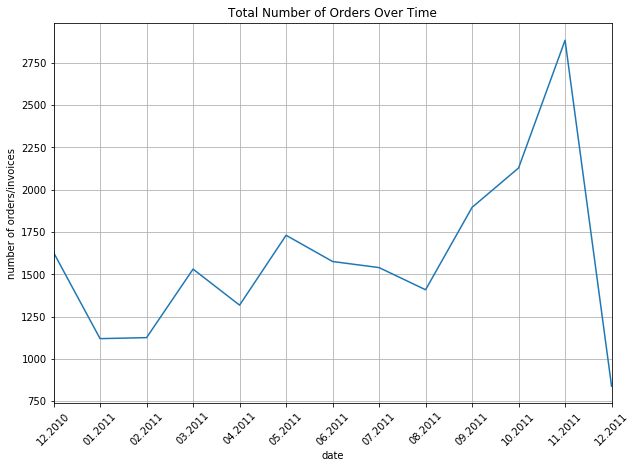

In [32]:
# plotting time series of monthly order

ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')
plt.xticks(range(len(monthly_orders_df.index)),
          [x.strftime('%m.%Y') for x in monthly_orders_df.index],
          rotation=45
)
plt.show()

In [33]:
# duration setting (by min date and max date)

invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [34]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

In [35]:
df.shape

(531285, 8)

In [36]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']
df.shape

(506150, 8)

In [37]:
# monthly order by due date

monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

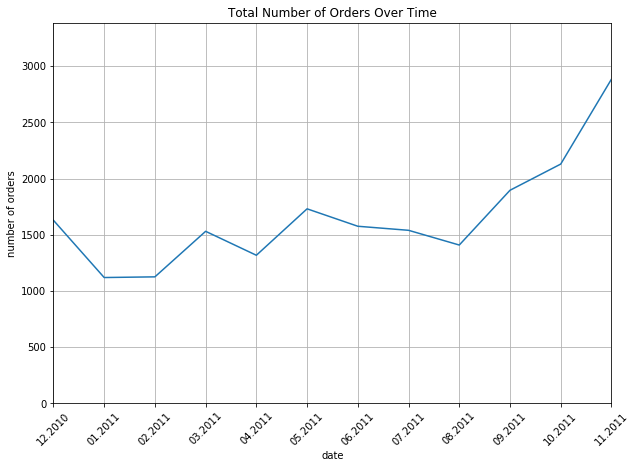

In [38]:
# plotting monthly order by duration

ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')
ax.set_ylim([0, max(monthly_orders_df.values)+500])
plt.xticks(range(len(monthly_orders_df.index)),
          [x.strftime('%m.%Y') for x in monthly_orders_df.index],
          rotation=45
)
plt.show()

In [39]:
# time series revenue
# define data frame of revenue

df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

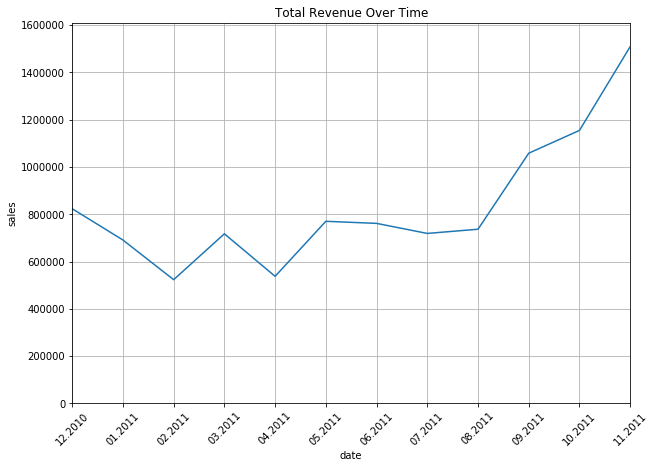

In [40]:
# plotting monthly revenue

ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)
plt.show()

In [42]:
# revenue from customer's retention
# define data frame of revenue from customer's retention

monthly_rev_retention_customers_df = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_retention_customers_df

InvoiceDate
2010-12-31     561185.200
2011-01-31     486023.930
2011-02-28     439572.440
2011-03-31     590358.020
2011-04-30     461628.581
2011-05-31     668473.320
2011-06-30     657552.860
2011-07-31     594593.001
2011-08-31     640390.730
2011-09-30     945171.272
2011-10-31    1034087.570
2011-11-30    1150586.570
Freq: M, Name: Sales, dtype: float64

In [43]:
monthly_rev_perc_retention_customers_df = monthly_rev_retention_customers_df / monthly_revenue_df * 100.0
monthly_rev_perc_retention_customers_df

InvoiceDate
2010-12-31    68.125988
2011-01-31    70.299225
2011-02-28    83.946843
2011-03-31    82.263885
2011-04-30    85.835102
2011-05-31    86.754325
2011-06-30    86.322491
2011-07-31    82.671786
2011-08-31    86.889870
2011-09-30    89.285854
2011-10-31    89.532996
2011-11-30    76.223211
Freq: M, Name: Sales, dtype: float64

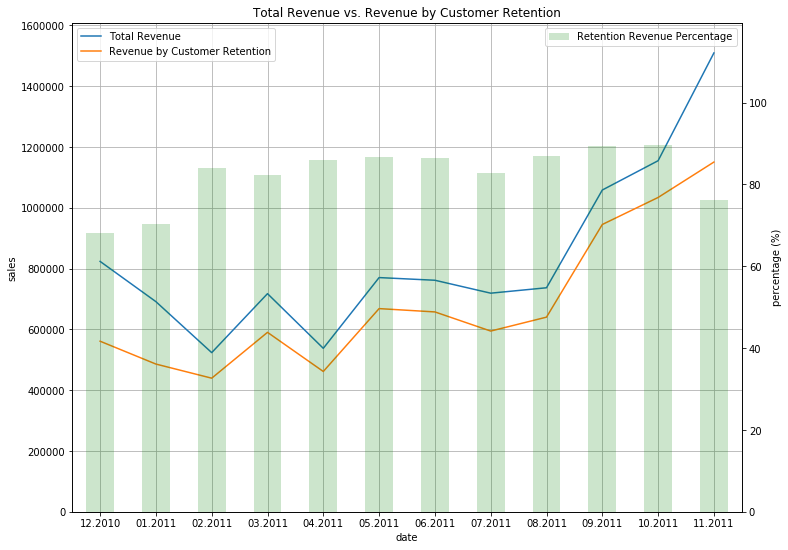

In [47]:
# plotting

ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_retention_customers_df.values).plot(
    ax=ax,
    grid=True,
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue by Customer Retention')
ax.legend(['Total Revenue', 'Revenue by Customer Retention'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_retention_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_retention_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Retention Revenue Percentage'])
ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_retention_customers_df.index
])
  
plt.show()

In [48]:
# popular items

date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode             
2010-12-31  10002              251
            10120               16
            10123C               1
            10124A               4
            10124G               5
            10125              154
            10133              130
            10135              411
            11001               74
            15034               45
            15036              161
            15039               20
            15044A               6
            15044B               3
            15044C              10
            15044D               1
            15056BL            194
            15056N             141
            15056P              73
            15056bl             11
            15056n              11
            15056p               5
            15058A               1
            15058B               1
            15060B              56
            16008               14
            16010               12
            16011               94
            16012              120
            16014             1029
...                            ...
2011-11-30  90202C               2
            90202D               3
            90204                7
            90205A               4
            90205C               4
            90206A               2
            90206C               8
            90208               12
            90209A              40
            90210D              11
            90211A               5
            90211B               2
            90214A              16
            90214C               6
            90214D               6
            90214E               6
            90214G               6
            90214H               8
            90214J               7
            90214K               6
            90214M               6
            90214N               2
            90214S              12
            90214V               1
            BANK CHARGES         2
            C2                 173
            DCGSSGIRL            1
            DOT                 47
            M                 3894
            POST              1262

[31701 rows x 1 columns]

In [49]:
# rank items in last month sales

last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()
last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
5,2011-11-30,22578,5366
6,2011-11-30,84879,5254
7,2011-11-30,22577,5003
8,2011-11-30,85123A,4910
9,2011-11-30,84077,4559


In [53]:
# top5 items in each month

date_item_df = pd.DataFrame(
    df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [70]:
# trend items (over time)

trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)
trending_items_df

Quantity                                   
StockCode      22086    22197    23084    84826  85099B
InvoiceDate                                            
2010-12-31    2460.0   2738.0      0.0    366.0  2152.0
2011-01-31      24.0   1824.0      0.0    480.0  2747.0
2011-02-28       5.0   2666.0      0.0     66.0  3080.0
2011-03-31      87.0   2803.0      0.0     60.0  5282.0
2011-04-30      13.0   1869.0      0.0      1.0  2456.0
2011-05-31      17.0   6849.0   1131.0      0.0  3621.0
2011-06-30     344.0   2095.0   1713.0      4.0  3682.0
2011-07-31     383.0   1876.0    318.0      2.0  3129.0
2011-08-31     490.0   5421.0   2267.0     72.0  5502.0
2011-09-30    2106.0   4196.0    680.0      0.0  4401.0
2011-10-31    3429.0   5907.0   6348.0     11.0  5412.0
2011-11-30    7908.0  12460.0  14954.0  12551.0  5909.0

In [71]:
trending_items_df.columns

MultiIndex(levels=[['Quantity'], ['22086', '22197', '23084', '84826', '85099B']],
           codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'StockCode'])

In [74]:
trending_items_df.columns = trending_items_df.columns.droplevel(0)

In [75]:
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


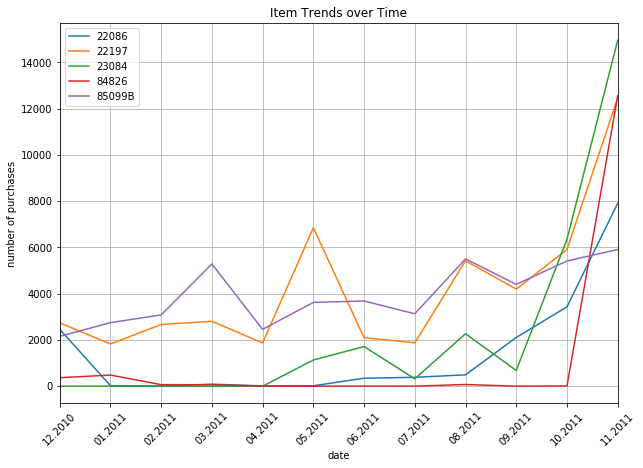

In [77]:
# plotting trend item

ax = pd.DataFrame(trending_items_df.values).plot(
    figsize=(10,7),
    grid=True,
)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_items_df.columns, loc='upper left')
plt.xticks(
    range(len(trending_items_df.index)), 
    [x.strftime('%m.%Y') for x in trending_items_df.index], 
    rotation=45
)
plt.show()